In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, classification_report
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [2]:
# Load and inspect the dataset
data_path = "breast-cancer.csv"
cancer_data = pd.read_csv(data_path)

# Remove the 'id' column
if "id" in cancer_data.columns:
    cancer_data.drop(columns="id", inplace=True)

# Encode diagnosis: Malignant=1, Benign=0
cancer_data["diagnosis"] = cancer_data["diagnosis"].map({"M": 1, "B": 0})

# Check for nulls
print("Missing Values:\n", cancer_data.isnull().sum())


Missing Values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [3]:
# View basic information about the dataset, including data types and non-null counts
print("\nDataset overview:")
print(cancer_data.info())



Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se

In [4]:
cancer_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


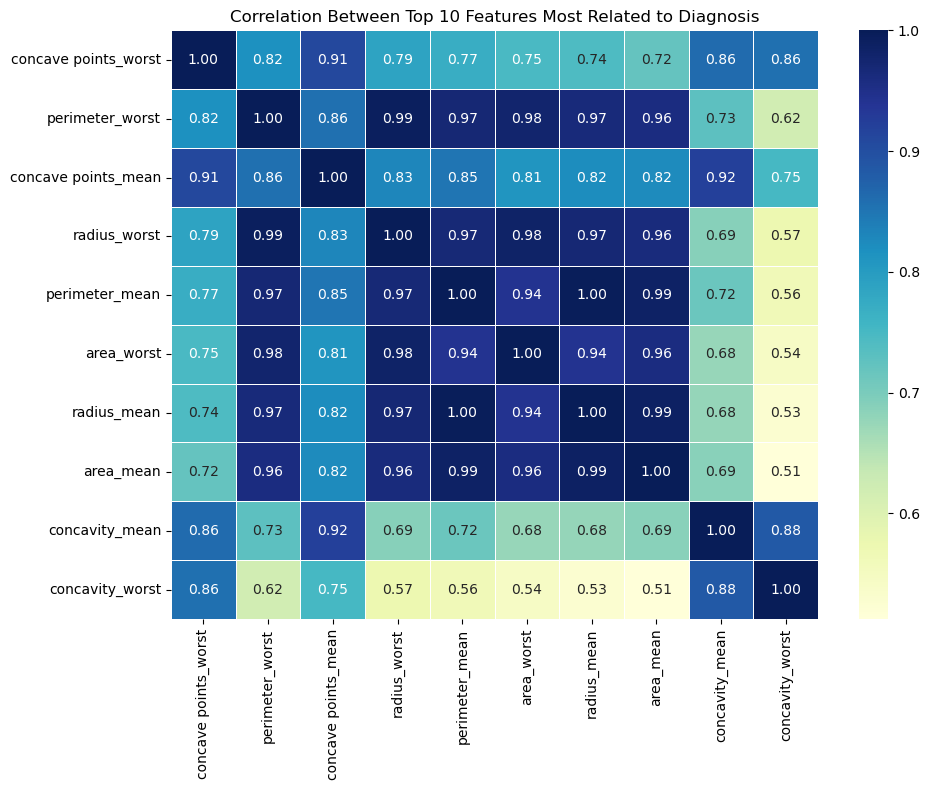

In [5]:
# Calculate correlation matrix
correlation_matrix = cancer_data.corr()

# Get correlations with the target ('diagnosis'), and sort them
cor_target = correlation_matrix["diagnosis"].abs().sort_values(ascending=False)

# Select top 10 most correlated features with 'diagnosis'
top_features = cor_target[1:11].index  # Exclude 'diagnosis' itself

# Create a smaller correlation matrix with just these features
reduced_corr_matrix = cancer_data[top_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(reduced_corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Top 10 Features Most Related to Diagnosis")
plt.tight_layout()
plt.show()



Target class distribution:
 diagnosis
0    357
1    212
Name: count, dtype: int64


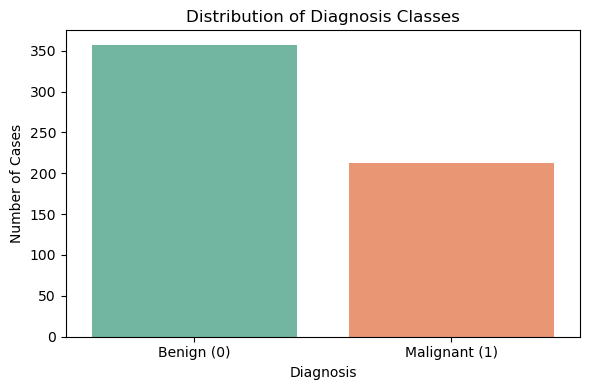


Class Percentages:
Benign: 62.74%
Malignant: 37.26%


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count how many malignant and benign cases there are
target_distribution = cancer_data["diagnosis"].value_counts()
print("\nTarget class distribution:\n", target_distribution)

# Plot the distribution for better visualization
plt.figure(figsize=(6, 4))
sns.countplot(x="diagnosis", data=cancer_data, palette="Set2")
plt.title("Distribution of Diagnosis Classes")
plt.xticks([0, 1], ["Benign (0)", "Malignant (1)"])
plt.xlabel("Diagnosis")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()

# Calculate and print the percentage of each class
total_cases = target_distribution.sum()
benign_percentage = (target_distribution[0] / total_cases) * 100
malignant_percentage = (target_distribution[1] / total_cases) * 100

print(f"\nClass Percentages:\nBenign: {benign_percentage:.2f}%\nMalignant: {malignant_percentage:.2f}%")


C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


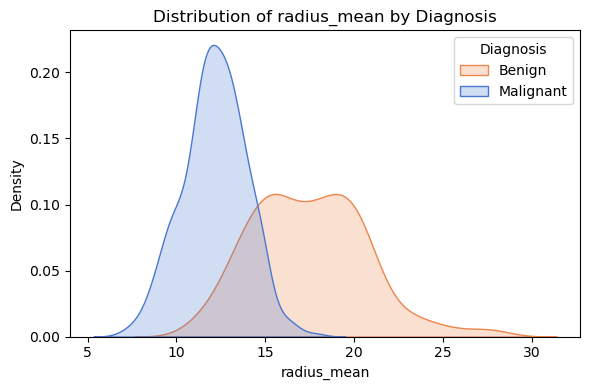

C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


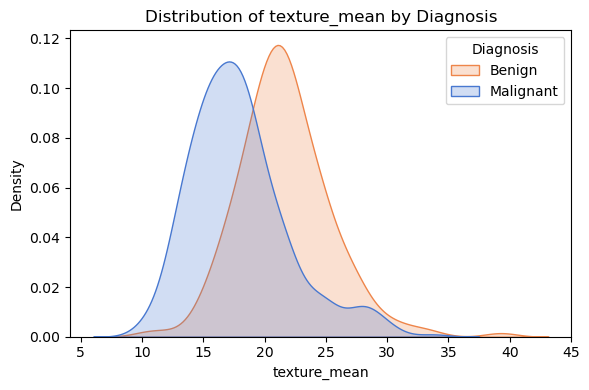

C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


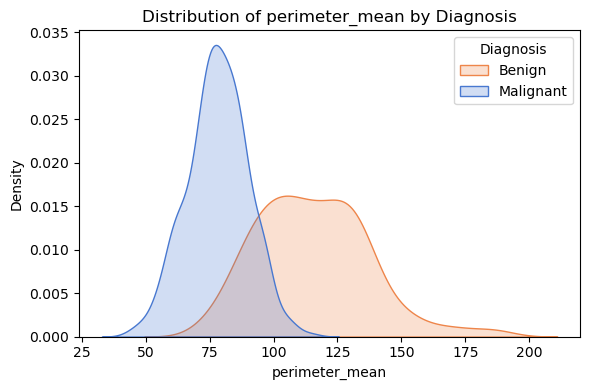

C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


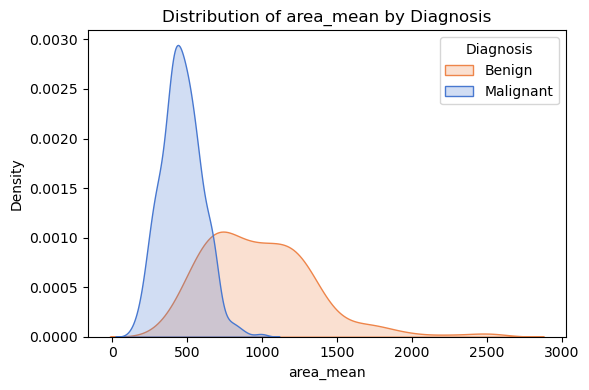

C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


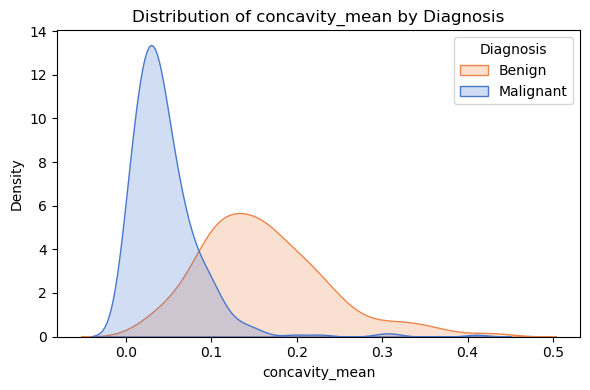

C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


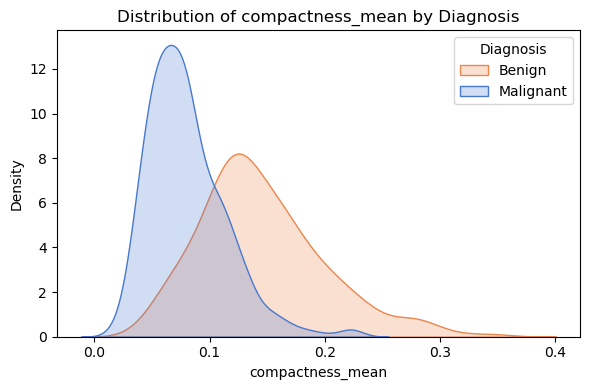

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of selected important features for visualization
selected_features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "concavity_mean", "compactness_mean"]

# Plot each feature's distribution grouped by diagnosis
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=cancer_data, x=feature, hue="diagnosis", fill=True, common_norm=False, palette="muted")
    plt.title(f"Distribution of {feature} by Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend(title="Diagnosis", labels=["Benign", "Malignant"])
    plt.tight_layout()
    plt.show()


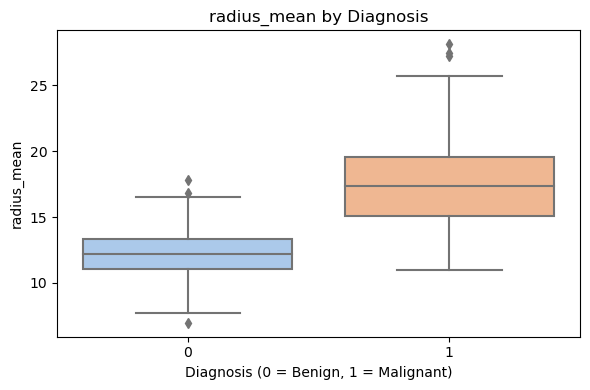

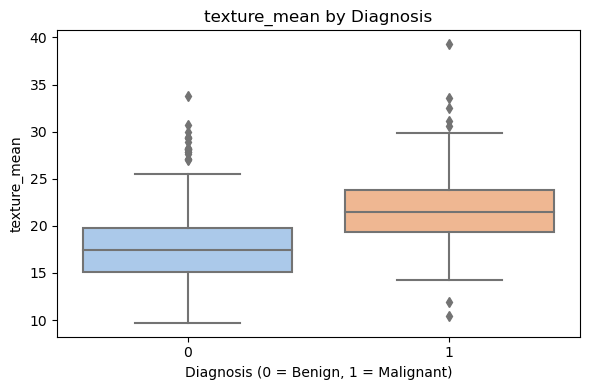

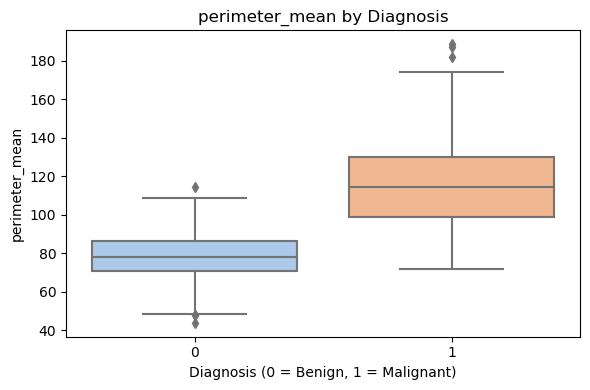

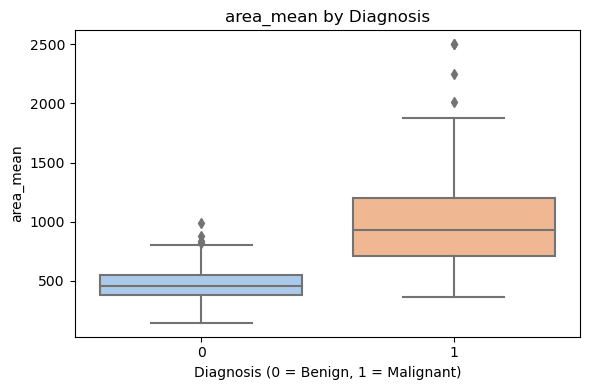

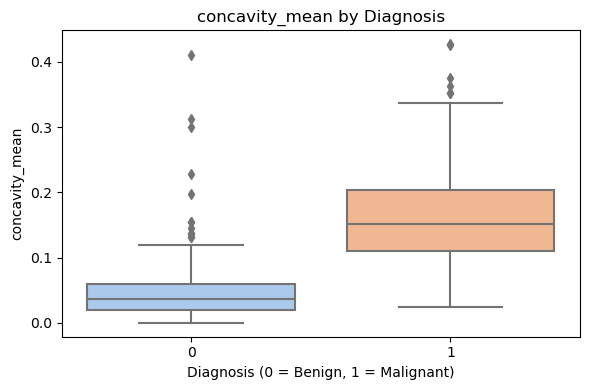

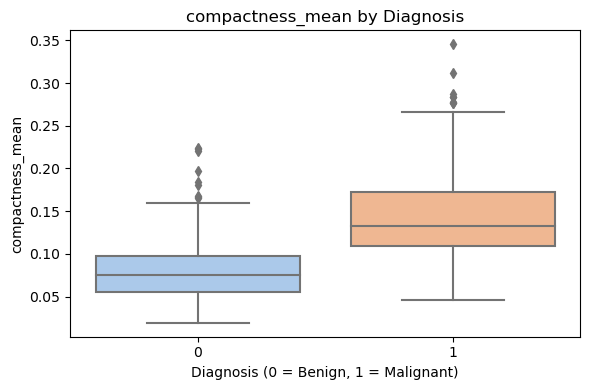

In [8]:
# Create boxplots for selected features
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="diagnosis", y=feature, data=cancer_data, palette="pastel")
    plt.title(f"{feature} by Diagnosis")
    plt.xlabel("Diagnosis (0 = Benign, 1 = Malignant)")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

    

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = cancer_data.drop(columns='diagnosis')
y = cancer_data['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


In [16]:
from sklearn.utils import resample
from collections import Counter
import numpy as np

# 1. Check original train/test class balance
print("Original class distribution in y_train:", Counter(y_train))
print("Original class distribution in y_test :", Counter(y_test))

# 2. Combine training data for resampling
X_train_df = pd.DataFrame(X_train, columns=[f'f{i}' for i in range(X_train.shape[1])])
X_train_df['diagnosis'] = y_train.values

# 3. Oversample only the training set
majority = X_train_df[X_train_df['diagnosis'] == 0]
minority = X_train_df[X_train_df['diagnosis'] == 1]

minority_upsampled = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=42
)

balanced_train_df = pd.concat([majority, minority_upsampled])

# 4. Separate features/labels again
X_balanced = balanced_train_df.drop(columns='diagnosis').values
y_balanced = balanced_train_df['diagnosis'].values

# 5. Check balanced training distribution
print("Balanced training set class distribution:", Counter(y_balanced))
print("X_balanced shape:", X_balanced.shape)
print("y_balanced shape:", y_balanced.shape)


Original class distribution in y_train: Counter({0: 285, 1: 170})
Original class distribution in y_test : Counter({0: 72, 1: 42})
Balanced training set class distribution: Counter({0: 285, 1: 285})
X_balanced shape: (570, 30)
y_balanced shape: (570,)


C:\Users\kisho\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:14:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Evaluation: XGBoost Classifier
AUC Score: 0.9927
Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.95      1.00      0.97        72
Malignant (1)       1.00      0.90      0.95        42

     accuracy                           0.96       114
    macro avg       0.97      0.95      0.96       114
 weighted avg       0.97      0.96      0.96       114



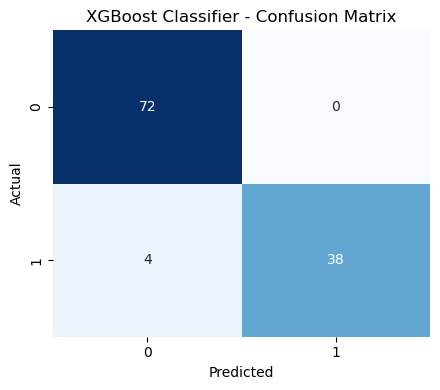


Model Evaluation: Random Forest Classifier
AUC Score: 0.9965
Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.96      1.00      0.98        72
Malignant (1)       1.00      0.93      0.96        42

     accuracy                           0.97       114
    macro avg       0.98      0.96      0.97       114
 weighted avg       0.97      0.97      0.97       114



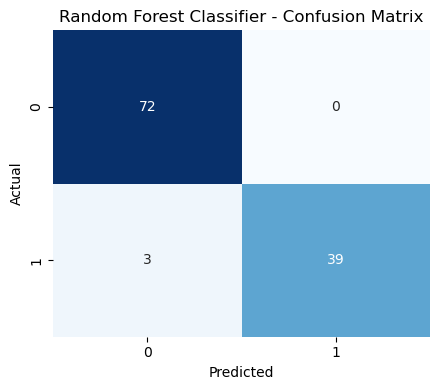


Model Evaluation: Artificial Neural Network (MLP)
AUC Score: 0.9931
Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.95      1.00      0.97        72
Malignant (1)       1.00      0.90      0.95        42

     accuracy                           0.96       114
    macro avg       0.97      0.95      0.96       114
 weighted avg       0.97      0.96      0.96       114



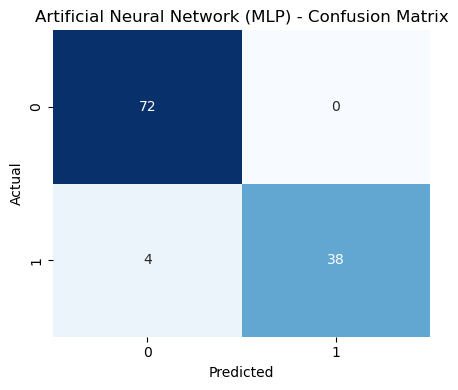

In [17]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class imbalance ratio for XGBoost
from collections import Counter
class_counts = Counter(y_train)
imbalance_ratio = class_counts[0] / class_counts[1]

# Define models
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=imbalance_ratio,
    random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    max_iter=500,
    random_state=42
)

# Train models
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Evaluate models
models = {
    "XGBoost Classifier": xgb_model,
    "Random Forest Classifier": rf_model,
    "Artificial Neural Network (MLP)": mlp_model
}

for model_name, model in models.items():
    print(f"\nModel Evaluation: {model_name}")
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba)
        print(f"AUC Score: {auc:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Benign (0)", "Malignant (1)"]))

    plt.figure(figsize=(4.5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


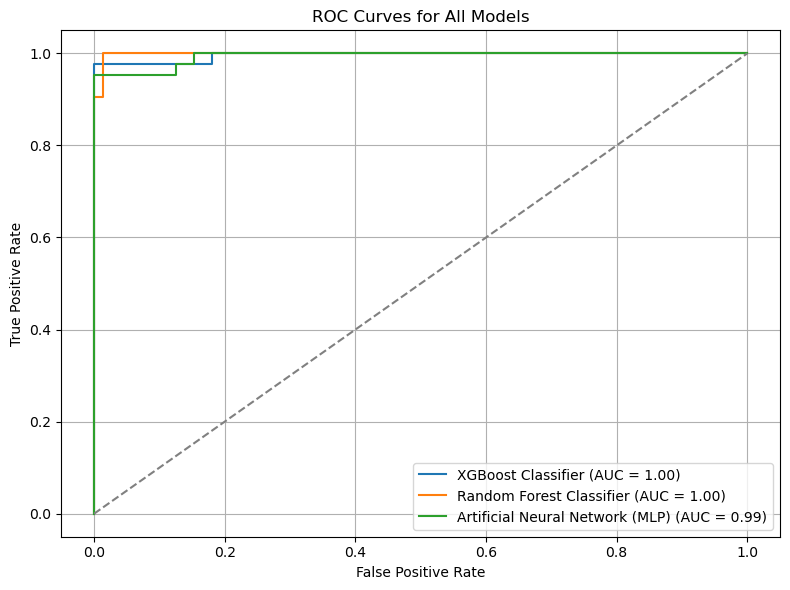

In [15]:
from sklearn.metrics import roc_curve, auc

# Set up the plot
plt.figure(figsize=(8, 6))

# Plot ROC curve for each model
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Formatting the plot
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
